In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

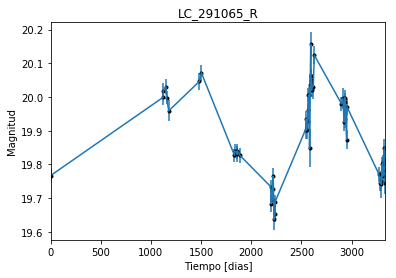

In [2]:
data = np.genfromtxt('LC_291065_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_291065_R')
plt.savefig("LC_291065_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

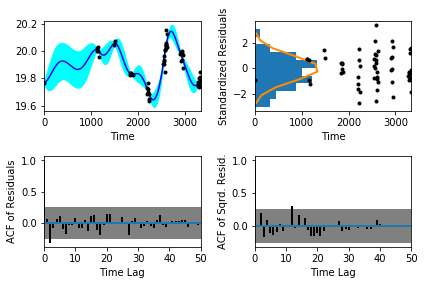

In [5]:
sample.assess_fit()

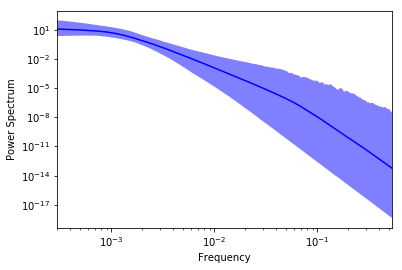

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

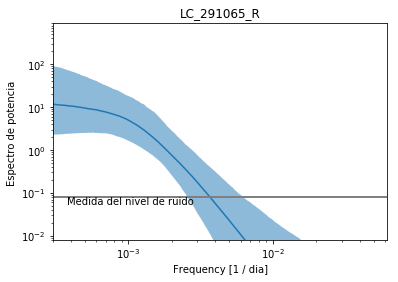

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_291065_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_291065_R')

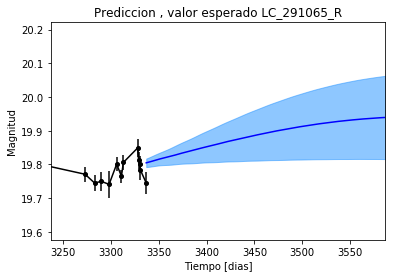

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_291065_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_291065_R')

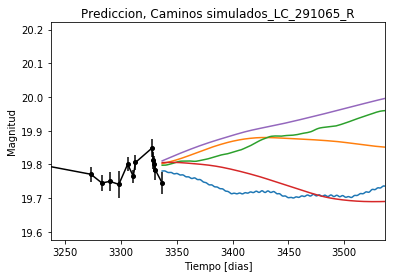

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_291065_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


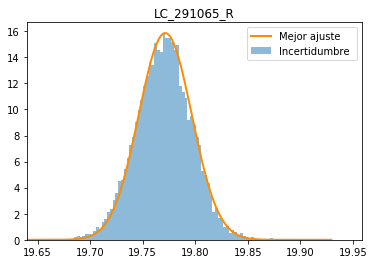

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_291065_R')
plt.savefig("Mejor_ajuste_LC_285764_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_291065_R')

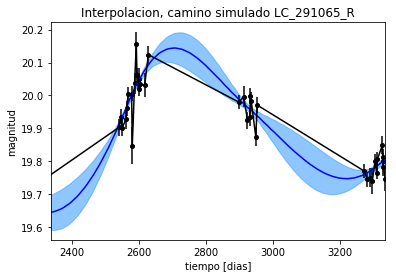

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_R')

Text(0.5,1,'Interpolacion, camino simulado LC_291065_R')

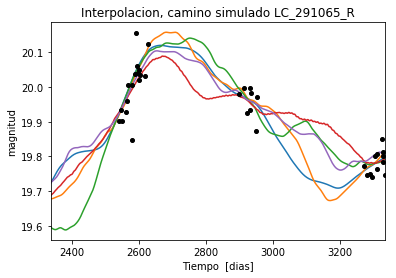

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 803.54855923
Median: 0.00573383816059
Standard deviation: 0.183025589835
68% credibility interval: [ 0.00068801  0.12051996]
95% credibility interval: [  3.43263159e-04   7.44826779e-01]
99% credibility interval: [  3.07960732e-04   1.01668604e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 333.040244176
Median: 0.00139400669335
Standard deviation: 0.06886135516
68% credibility interval: [ 0.0004951   0.01369587]
95% credibility interval: [ 0.00032762  0.14246726]
99% credibility interval: [  3.05239441e-04   5.46690297e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1191.24662935
Median: 0.00621775666562
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1616.1087826
Median: 120.083330839
Standard deviation: 1.70978923929
68% credibility interval: [ 118.22069473  121.43566419]
95% credibility interval: [ 115.7873446   122.37337959]
99% credibility interval: [ 113.63272698  122.71624345]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 345.504065953
Median: 0.424347040772
Standard deviation: 1.90652029318
68% credibility interval: [ 0.03995149  2.96079381]
95% credibility interval: [ 0.0132212   6.67709162]
99% credibility interval: [ 0.01002037  9.34520219]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 583.814818643
Median: 0.161633027774
Standard deviation: 8.16298577149
68% credibility interval: [ 0.00673721  4.88294176]
95% credibility interval: [  7.10415958e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 877.610487675
Median: 5.11712041603e-22
Standard deviation: 4.23390683099e+18
68% credibility interval: [  9.84794850e-53   1.22739510e-04]
95% credibility interval: [  9.39376395e-115   2.33597199e+001]
99% credibility interval: [  2.56090406e-128   3.20975916e+010]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3092.34034531
Median: 19.885762185
Standard deviation: 0.0853249413136
68% credibility interval: [ 19.81401996  19.9519989 ]
95% credibility interval: [ 19.7124022  20.0445052]
99% credibility interval: [ 19.6015078   20.16233963]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 361.352781434
Median: 0.00170751855418
Standard deviation: 0.233804892232
68% credibility interval: [ 0.          0.26080986]
95% credibility interval: [ 0.          0.87098527]
99% credibility interval: [ 0.          1.00687375]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 361.352781434
Median: 0.00170751855418
Standard deviation: 0.233804892232
68% credibility interval: [ 0.          0.26080986]
95% credibility interval: [ 0.          0.87098527]
99% credibility interval: [ 0.          1.00687375]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 579.842002452
Median: 0.0
Standard deviation: 0.000459567720748
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1616.1087826
Median: 120.083330839
Standard deviation: 1.70978923929
68% credibility interval: [ 118.22069473  121.43566419]
95% credibility interval: [ 115.7873446   122.37337959]
99% credibility interval: [ 113.63272698  122.71624345]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2925.13485635
Median: 0.0273132323034
Standard deviation: 0.0442803989271
68% credibility interval: [ 0.01596787  0.05673545]
95% credibility interval: [ 0.01032849  0.13927035]
99% credibility interval: [ 0.00762504  0.27692065]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2370.73186411
Median: 1.35946242157
Standard deviation: 0.203612561709
68% credibility interval: [ 1.17487389  1.58771012]
95% credibility interval: [ 1.01392157  1.81385747]
99% credibility interval: [ 0.91914137  1.93537503]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1216.58595407
Median: 2.72305517439e-05
Standard deviation: 0.0492270798514
68% credibility interval: [  8.66387663e-07   1.07494875e-03]
95% credibility interval: [  2.90094418e-08   1.37088460e-02]
99% credibility interval: [  1.95488737e-15   2.50355293e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 803.54855923
Median: (-0.0360267676844-0.149660696248j)
Standard deviation: 1.86562039246
68% credibility interval: [-0.75724927+0.j        -0.00432287-0.0040635j]
95% credibility interval: [ -4.67988467e+00-5.54218315j  -2.15678604e-03-1.41558466j]
99% credibility interval: [ -6.38802676e+00+0.j          -1.93497435e-03-0.00542576j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 333.040244176
Median: (-0.00875880237374+0.0059855304906j)
Standard deviation: 1.53143041326
68% credibility interval: [-0.08605367+5.10839853j -0.00311079+0.20445805j]
95% credibility interval: [-0.89514820+4.94876681j -0.00205851+0.j        ]
99% credibility interval: [ -3.43495644e+00+5.95905353j  -1.91787597e-03+0.j        ]
Posterior sum